**Import Libraries**

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

import seaborn as sns  
sns.set_style("whitegrid")

import missingno as msno
from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
import json
import pickle

In [76]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from sklearn.metrics import classification_report   
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.combine import SMOTETomek
from lazypredict.Supervised import LazyClassifier

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [80]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

It's imbalanced dataset.

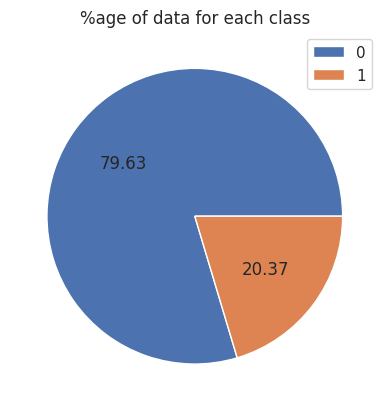

In [81]:
plt.pie(df['churn'].value_counts(),  autopct='%.2f')
plt.title('%age of data for each class')
labels = [0 ,1]
plt.legend(labels)
plt.show()

The dataset is imbalanced

**Explore dataset**

In [82]:
# Let's see first 5 records in the dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [84]:
df.shape

(10000, 12)

There are 10000 rows in the dataset.   
12 columns in the dataset.  
-  11 predictors
-  1 Target variable

This is clearly a classification problem.   

**Univariate Analysis**

Let's explore the **customer_id** and see how many unique ids are there in the dataset

In [85]:
df['customer_id'].nunique()

10000

The dataset contains 10,000 unique customers, but this information is irrelevant to predicting customer retention. Therefore, we should remove this column from the dataset.

In [86]:
df.drop('customer_id',axis = 1, inplace = True)

In [87]:
df.shape

(10000, 11)

We can see that the customer_id has been removed from the dataset.

**Analysis of Credit Score**

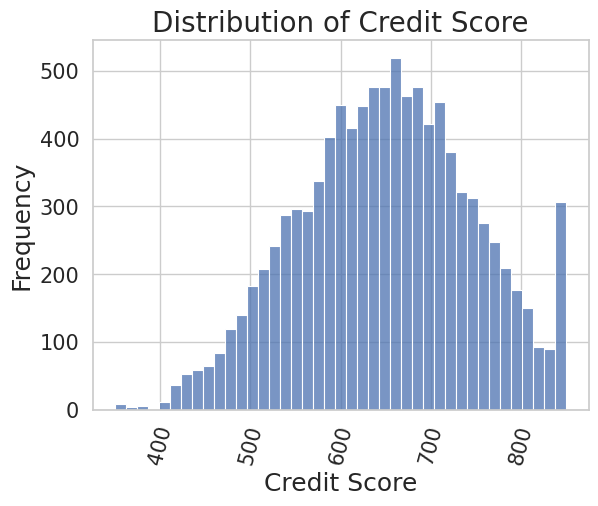

In [88]:
#Distribution of credit score
sns.histplot(df['credit_score'])
plt.title('Distribution of Credit Score', fontsize = 20)
plt.xlabel('Credit Score', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

It will be interesting to investigate the points which are having low credit score.

Let's investigate **Country** variable

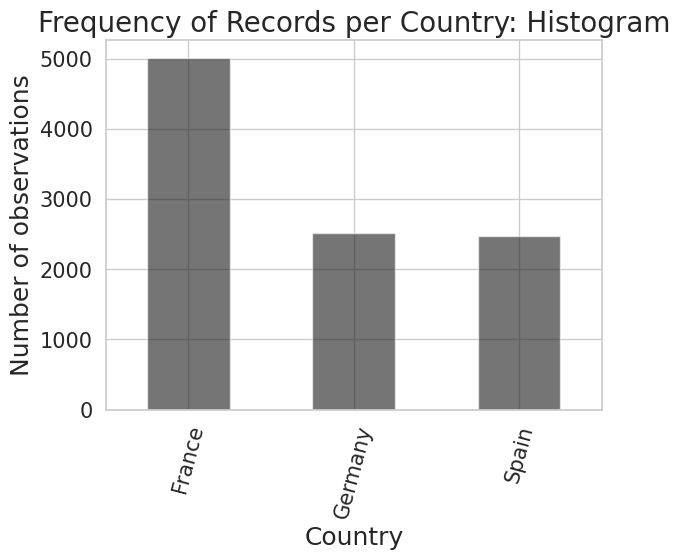

In [89]:
# We can see that there is data related to 3 countries. France, Germany and Spain. 
df['country'].value_counts().plot(kind = 'bar', color = 'k', alpha = 0.6)
plt.title('Frequency of Records per Country: Histogram', fontsize = 20 )
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

Let's investigate **Age** variable

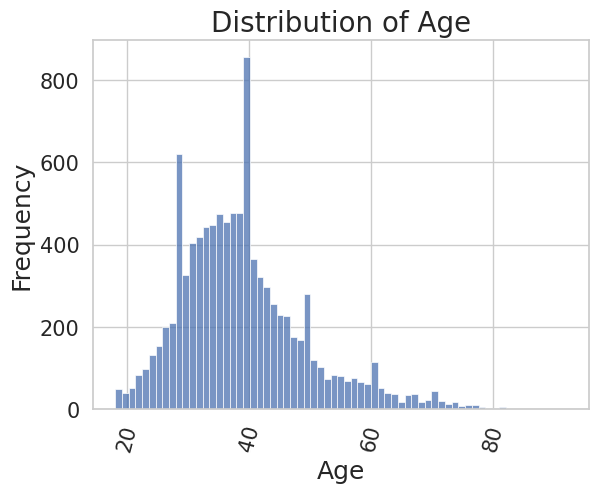

In [90]:
#Distribution of age
sns.histplot(df['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

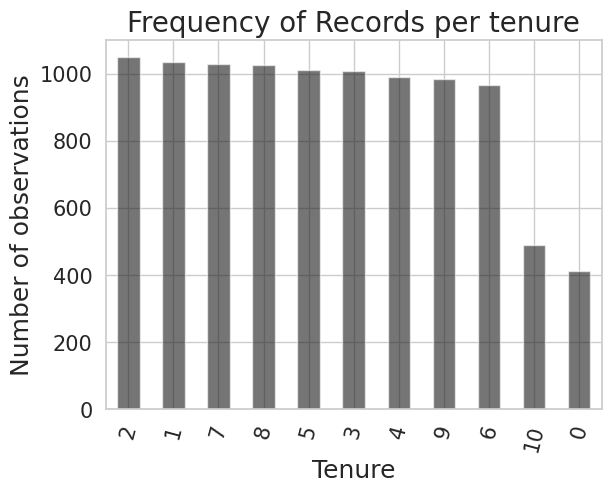

In [91]:
# We can see that there is data related to 3 countries. France, Germany and Spain. 
df['tenure'].value_counts().plot(kind = 'bar', color = 'k', alpha = 0.6)
plt.title('Frequency of Records per tenure', fontsize = 20 )
plt.xlabel('Tenure', fontsize = 18)
plt.ylabel('Number of observations', fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

In [92]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

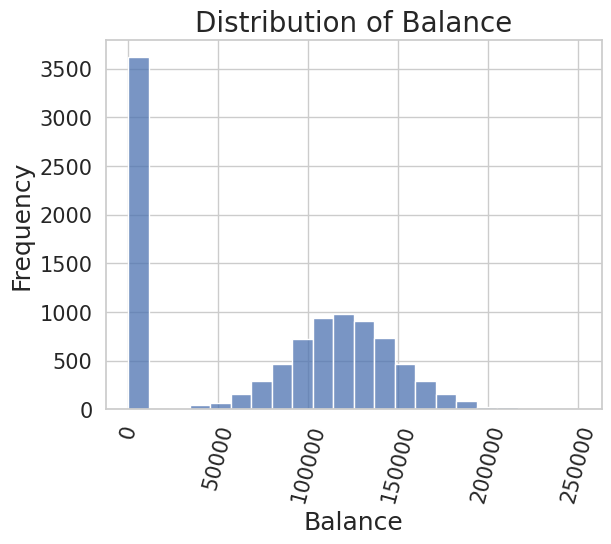

In [93]:
#Distribution of balance
sns.histplot(df['balance'])
plt.title('Distribution of Balance', fontsize = 20)
plt.xlabel('Balance', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15);

<Axes: >

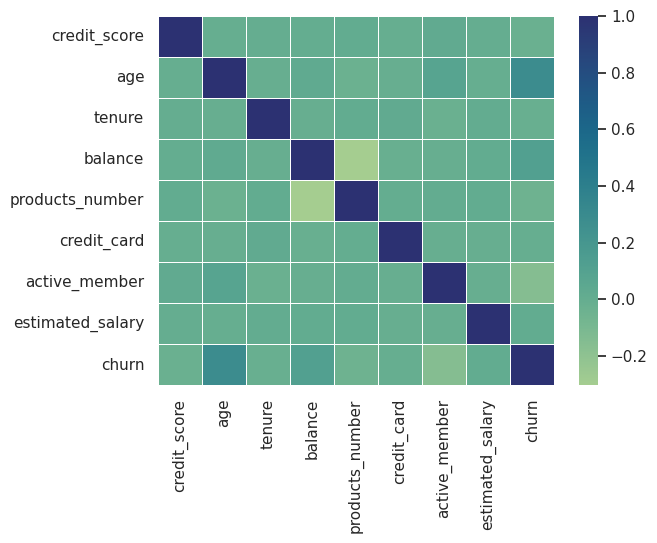

In [94]:
#heatmap of data 
sns.heatmap( df.corr(), cmap="crest",linewidth=.5)

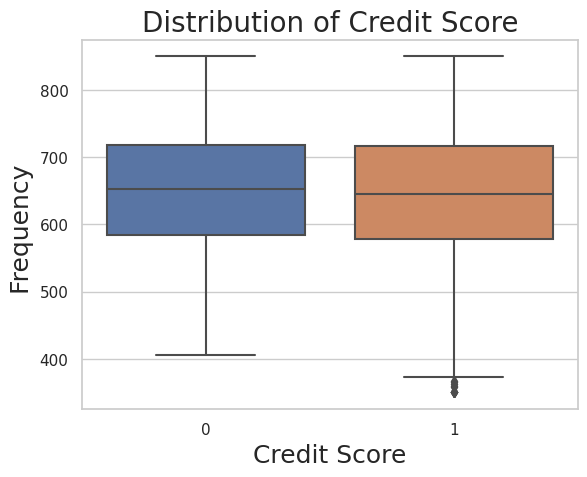

In [95]:
#Let's see the boxplot for the credit score
sns.boxplot(y= df['credit_score'],x = df['churn'])
plt.title('Distribution of Credit Score', fontsize = 20)
plt.xlabel('Credit Score', fontsize = 18)
plt.ylabel('Frequency ', fontsize = 18)
plt.show()

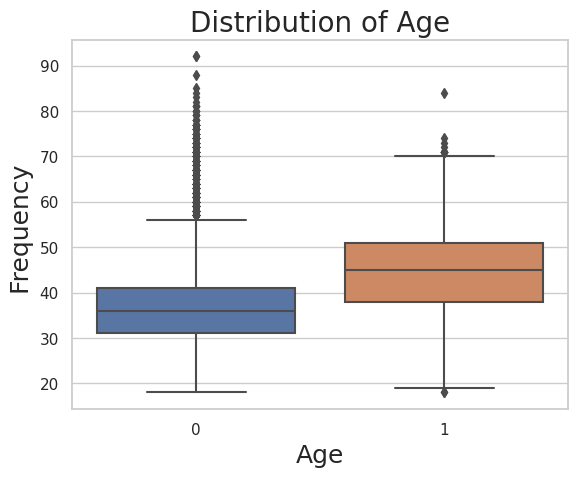

In [96]:
#Let's see the boxplot for the credit score
sns.boxplot(y= df['age'],x = df['churn'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Frequency ', fontsize = 18)
plt.show()

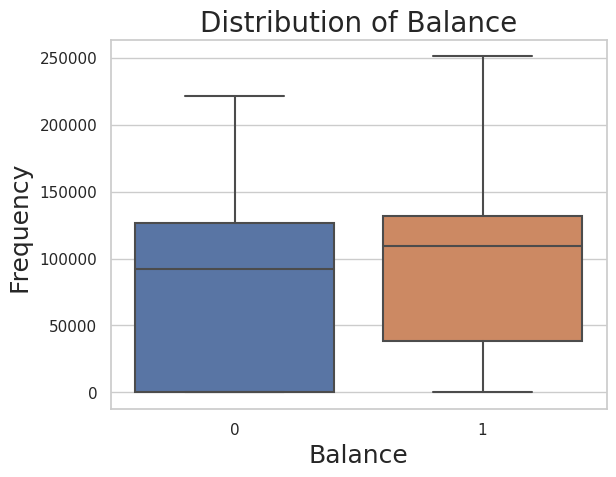

In [97]:
#Let's see the boxplot for the credit score
sns.boxplot(y= df['balance'],x = df['churn'])
plt.title('Distribution of Balance', fontsize = 20)
plt.xlabel('Balance', fontsize = 18)
plt.ylabel('Frequency ', fontsize = 18)
plt.show()

In [98]:
px.histogram(df,x='active_member', color = 'churn',barmode = 'group')

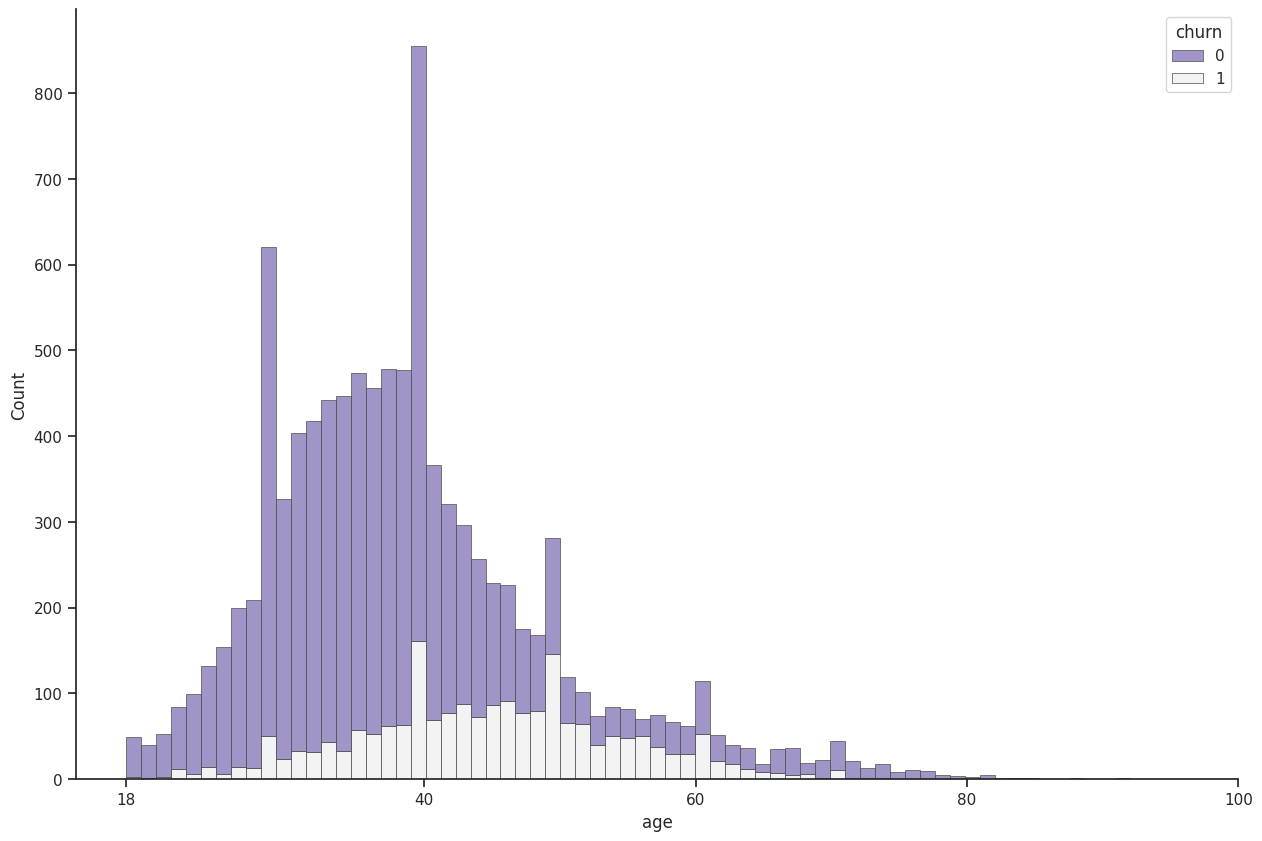

In [99]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15,10))
sns.despine(f)

sns.histplot(df,x="age", hue="churn",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([18, 40, 60, 80, 100])

In [100]:
px.histogram(df,x='country', color = 'churn',barmode = 'group')

<Axes: >

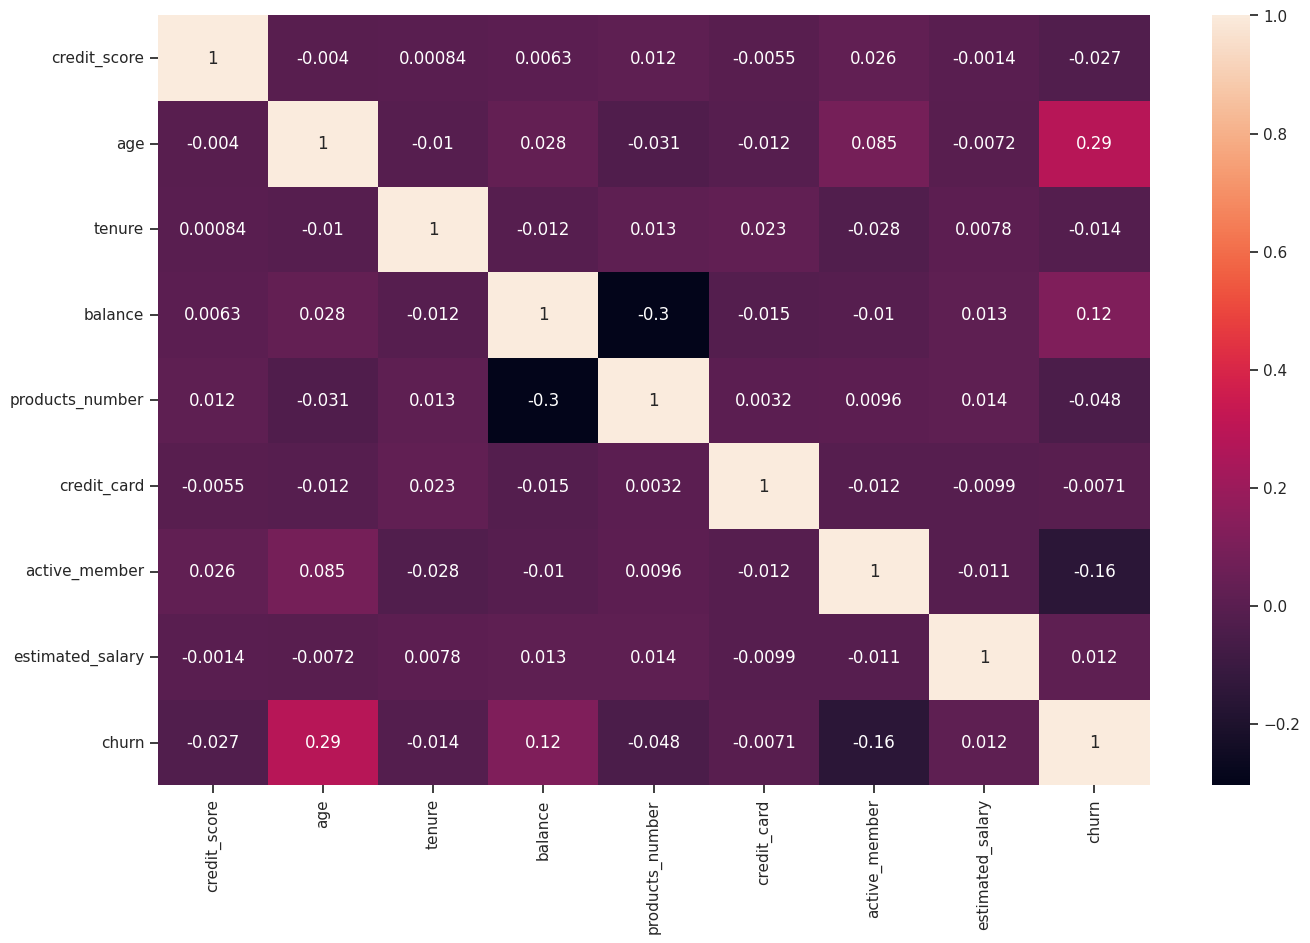

In [101]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cbar = True , annot=True)

Preprocessing


In [102]:
#function to convert categorical variable into one hot encoded values
def onehotencoding(df, col_name):
    dummy = pd.get_dummies(df[[col_name]])
    res = pd.concat([df, dummy ], axis=1)
    res.drop(col_name,inplace = True,axis = 1)
    return(res)

In [103]:
df = onehotencoding(df,'country')
df = onehotencoding(df,'gender')

In [104]:
data = df
x= data.copy();
x.drop('churn',axis = 1,inplace = True)
y = data['churn']

In [105]:
smk = SMOTETomek(random_state=123)
x_res , y_res = smk.fit_resample(x,y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [107]:
clf = LazyClassifier( ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [01:26<00:00,  2.98s/it]


In [108]:
print(models)


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.90   
XGBClassifier                      0.89               0.89     0.89      0.89   
ExtraTreesClassifier               0.89               0.89     0.89      0.89   
LGBMClassifier                     0.89               0.89     0.89      0.89   
BaggingClassifier                  0.88               0.88     0.88      0.88   
SVC                                0.87               0.87     0.87      0.87   
AdaBoostClassifier                 0.86               0.86     0.86      0.86   
KNeighborsClassifier               0.86               0.86     0.86      0.86   
NuSVC                              0.85               0.85     0.85      0.85   
LabelSpreading                     0.86               0.85     0.85      0.86   
LabelPropagation            

In [109]:
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model'})

line.show()

Random Forest Classfier is doing best in this case. Let's save this model and deploy it in the streamlit application.

In [111]:
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [2, 5, 7, 9]
}

In [112]:

clf = RandomForestClassifier()

# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

0.8930982131462448


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [113]:
grid_clf.best_params_

{'max_depth': 9, 'n_estimators': 20}

In [114]:
x.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [115]:
clf = RandomForestClassifier(max_depth = 9 , n_estimators = 15)
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=9, n_estimators=15)

In [116]:
np.mean(clf.predict(X_test) != y_test)

0.13219227967953387

In [ ]:
# Convert the model to a dictionary
model_dict = {'model': joblib.dump(clf, 'model.pkl')}

# Save the model as JSON
with open('model.json', 'w') as file:
    json.dump(model_dict, file)

In [120]:
# save the model to disk
filename = 'randomForest.sav'
pickle.dump(clf, open(filename, 'wb'))